In [2]:
import tensorflow as tf
from tensorflow.keras import datasets , layers, models
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(x_train , y_train) , (x_test, y_test) = datasets.cifar10.load_data()
x_train.shape

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


(50000, 32, 32, 3)

In [4]:
x_test.shape

(10000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [7]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [8]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [14]:
def plot_sample(x , y , index):
  plt.figure(figsize=(15,2))
  plt.imshow(x[index])
  plt.xlabel(classes[y[index]])

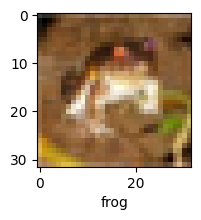

In [15]:
plot_sample(x_train , y_train , 0)

In [16]:
x_train = x_train/255.0
x_test = x_test/255.0

In [17]:
from tensorflow.keras.models import Sequential

In [18]:
ann = models.Sequential(
    [
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')
]
    )

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [20]:
ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [22]:
ann.fit(x_train, y_train, epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 132s 84ms/step - accuracy: 0.4600 - loss: 1.5336
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 142s 85ms/step - accuracy: 0.4811 - loss: 1.4802
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 143s 85ms/step - accuracy: 0.4955 - loss: 1.4334
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 151s 90ms/step - accuracy: 0.5098 - loss: 1.3879
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 134s 85ms/step - accuracy: 0.5292 - loss: 1.3452


In [23]:
from sklearn.metrics import confusion_matrix , classification_report



In [24]:
y_pre = ann.predict(x_test)
ypre_classes = [np.argmax(element) for element in y_pre]
print("Classification Report: \n", classification_report(y_test, ypre_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.63      0.57      0.60      1000
           1       0.55      0.73      0.63      1000
           2       0.45      0.28      0.34      1000
           3       0.38      0.20      0.26      1000
           4       0.60      0.23      0.33      1000
           5       0.29      0.68      0.41      1000
           6       0.51      0.59      0.55      1000
           7       0.57      0.58      0.58      1000
           8       0.69      0.58      0.63      1000
           9       0.59      0.55      0.56      1000

    accuracy                           0.50     10000
   macro avg       0.53      0.50      0.49     10000
weighted avg       0.53      0.50      0.49     10000

